# Using Method of Moments (MOM) to predict values for a One-Humped Dataset

In [12]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import gamma
%matplotlib inline

In [13]:
#Now we have taken data set of snow of last few years in Utah

In [14]:
# Importing dataset
df=pd.read_excel('data/Snow.xlsx')


In [15]:
df.head()

,Date,24 hr New Snow,Season Snowfall Total,Base Depth
0,2017-01-03,46,59,188
1,2017-01-04,5,64,188
2,2017-01-05,28,92,185
3,2017-01-08,8,100,185
4,2017-01-09,13,113,185


In [16]:
print(df)

          Date  24 hr New Snow  Season Snowfall Total  Base Depth
0   2017-01-03              46                     59         188
1   2017-01-04               5                     64         188
2   2017-01-05              28                     92         185
3   2017-01-08               8                    100         185
4   2017-01-09              13                    113         185
..         ...             ...                    ...         ...
580 2009-12-23              13                   1150         119
581 2009-12-24               3                   1153         119
582 2009-12-25               3                   1156         117
583 2009-12-27               3                   1159         117
584 2009-12-31              43                   1202         135

[585 rows x 4 columns]


In [17]:
df.describe()

,24 hr New Snow,Season Snowfall Total,Base Depth
count,585.000000,585.000000,585.000000
mean,15.584615,653.923077,193.728205
std,12.825759,362.788335,93.929639
min,3.000000,3.000000,0.000000
25%,5.000000,420.000000,142.000000
50%,13.000000,598.000000,196.000000
75%,23.000000,862.000000,259.000000
max,64.000000,1923.000000,401.000000


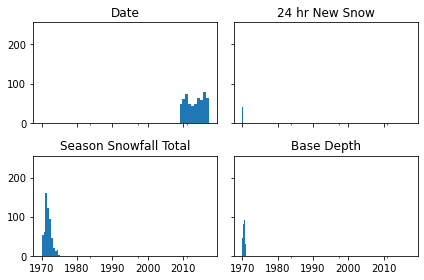

In [18]:
# Dataset histogram 
_ = df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [19]:
#Calculating mean and variance of the data set over all these years

In [20]:
# Mean of the dataset
df_mean=df.mean(axis=0)
df_mean

C:\Users\MANISH~1\AppData\Local\Temp/ipykernel_20896/2043431209.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_mean=df.mean(axis=0)


24 hr New Snow            15.584615
Season Snowfall Total    653.923077
Base Depth               193.728205
dtype: float64

In [21]:
# Calculating the alpha and beta 
alpha_mom=df_mean ** 2/df_variance
beta_mom=df_variance/df_mean
alpha_mom,beta_mom

(24 hr New Snow           1.476475
 Season Snowfall Total    3.248977
 Base Depth               4.253833
 dtype: float64,
 24 hr New Snow            10.555288
 Season Snowfall Total    201.270425
 Base Depth                45.542037
 dtype: float64)

In [22]:
# Variance of the dataset
df_variance=df.var()
df_variance


C:\Users\MANISH~1\AppData\Local\Temp/ipykernel_20896/2929161662.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_variance=df.var()


24 hr New Snow              164.500105
Season Snowfall Total    131615.375922
Base Depth                 8822.777028
dtype: float64

In [23]:
df_std=df.std()
df_std

Date                     912 days 14:10:42.078448176
24 hr New Snow                             12.825759
Season Snowfall Total                     362.788335
Base Depth                                 93.929639
dtype: object

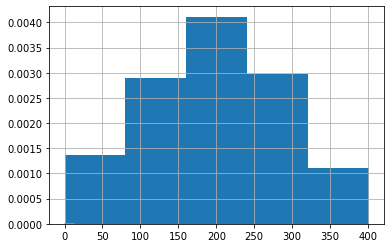

In [24]:
from scipy.stats.distributions import gamma
df.iloc[:,3].hist(density=True, bins=5)
plt.plot(np.linspace(0,13), gamma.pdf(np.linspace(0, 13), alpha_mom[2], beta_mom[2]))

In [25]:

#Now let's calculate the gamma PDF using the above computed alphas and betas!

In [26]:
#We can predict more than one column with this generic function
def predSample(sampleSize):
    predictions = {}
    for key in df_mean.to_dict().keys():
        mu = df_mean.to_dict()[key]
        sigma = df_variance.to_dict()[key]
        key_new = key.replace('Date','Predicted')        
        predictions[key_new] = gamma.rvs(0.1,size=sampleSize, loc=mu, scale=sigma, random_state=0)
    return predictions 

In [27]:
#Predicting the future Base Depth column for next 4 dates
prediction_values = predSample(4)
prediction_values["Base Depth"]


array([215.59842721, 249.58472463, 195.37154204, 195.99938491])